In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [11]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [13]:
corr_mat = df.corr()
corr_mat

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


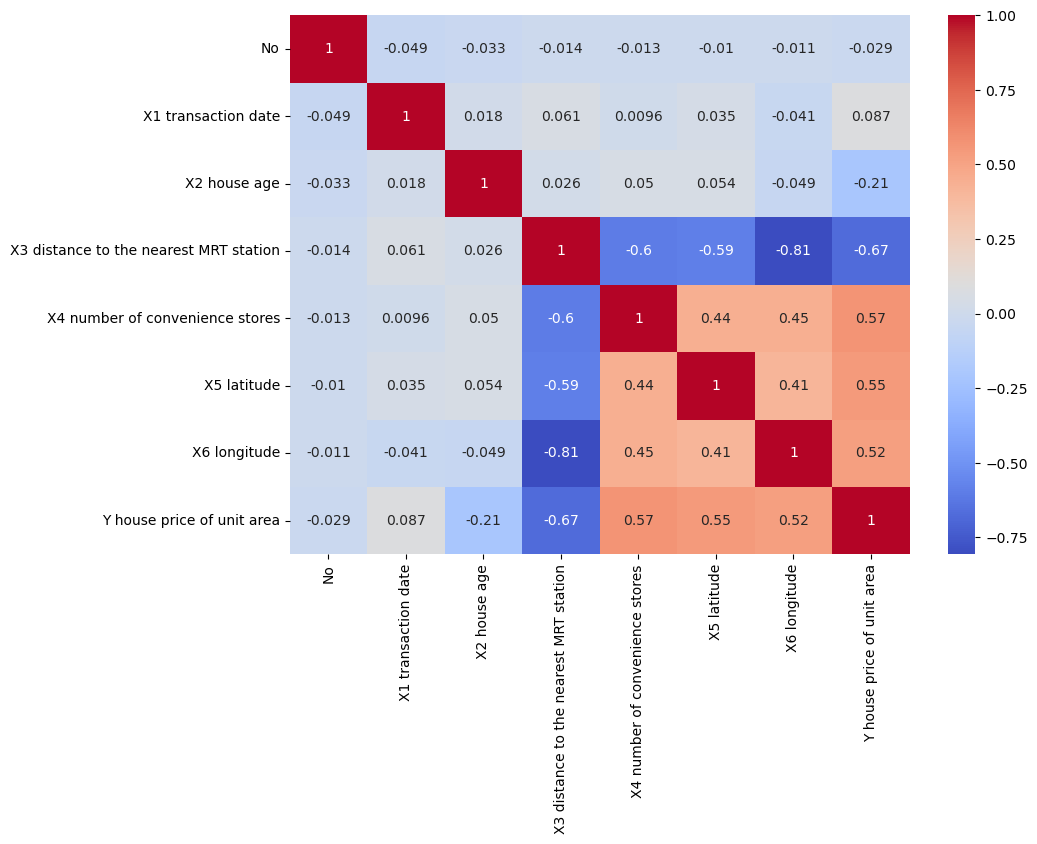

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [29]:
x = df.drop('Y house price of unit area', axis = 1)
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


In [31]:
y = df['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [46]:
x_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069
234,235,2013.250,8.0,2216.61200,4,24.96007,121.51361
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254
45,46,2013.083,36.6,488.81930,8,24.97015,121.54494
245,246,2013.417,7.5,639.61980,5,24.97258,121.54814
...,...,...,...,...,...,...,...
71,72,2013.083,35.5,640.73910,3,24.97563,121.53715
106,107,2013.083,17.2,189.51810,8,24.97707,121.54308
270,271,2013.333,10.8,252.58220,1,24.97460,121.53046
348,349,2012.833,4.6,259.66070,6,24.97585,121.54516


In [48]:
x_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,359,2013.167,1.1,193.5845,6,24.96571,121.54089
350,351,2013.000,13.2,492.2313,5,24.96515,121.53737
373,374,2013.083,0.0,274.0144,1,24.97480,121.53059
399,400,2012.917,12.7,170.1289,1,24.97371,121.52984
369,370,2012.667,20.2,2185.1280,3,24.96322,121.51237
...,...,...,...,...,...,...,...
31,32,2012.750,29.6,769.4034,7,24.98281,121.53408
283,284,2013.417,33.5,1978.6710,2,24.98674,121.51844
157,158,2013.250,16.1,815.9314,4,24.97886,121.53464
203,204,2012.667,15.6,289.3248,5,24.98203,121.54348


In [54]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [68]:

y_pred = model.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² score:', r2_score(y_test, y_pred))

MSE: 54.60196067337773
R² score: 0.6745228670350836


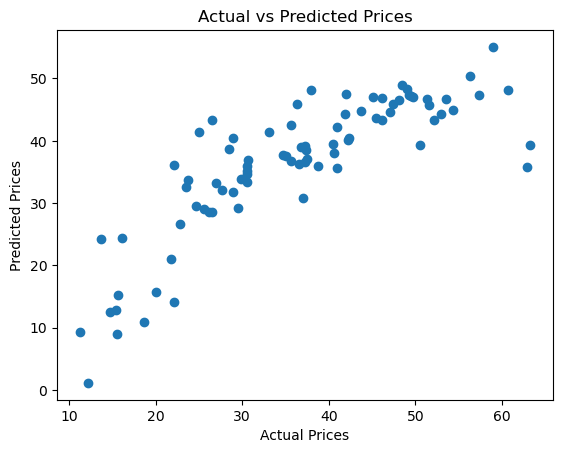

In [70]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()